In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing import image
from keras.applications import imagenet_utils

### 2. Data preparation

In [2]:
train_path  = 'train'
valid_path  = 'valid'
test_path  = 'test'

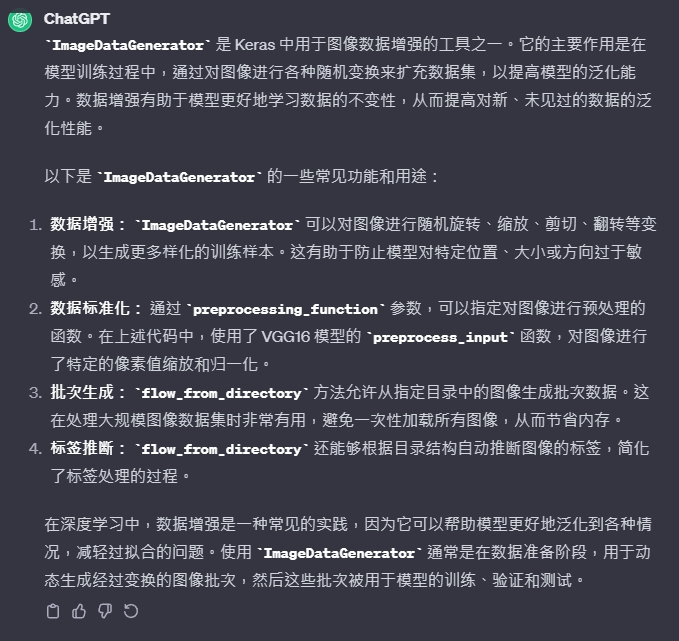

In [45]:
Image('img/IDG.jpg', width=500)

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=30)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=30)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=30)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### 3. Download VGGNet and create our new network

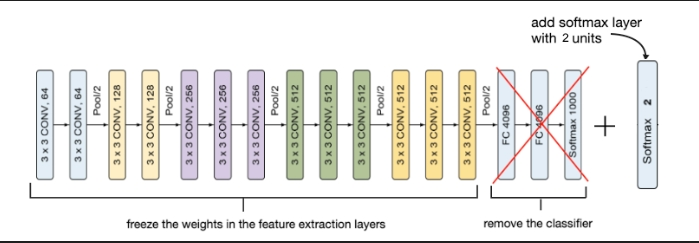

In [4]:
from IPython.display import Image
Image('img/vgg.jpg') #----->原本有1000分類

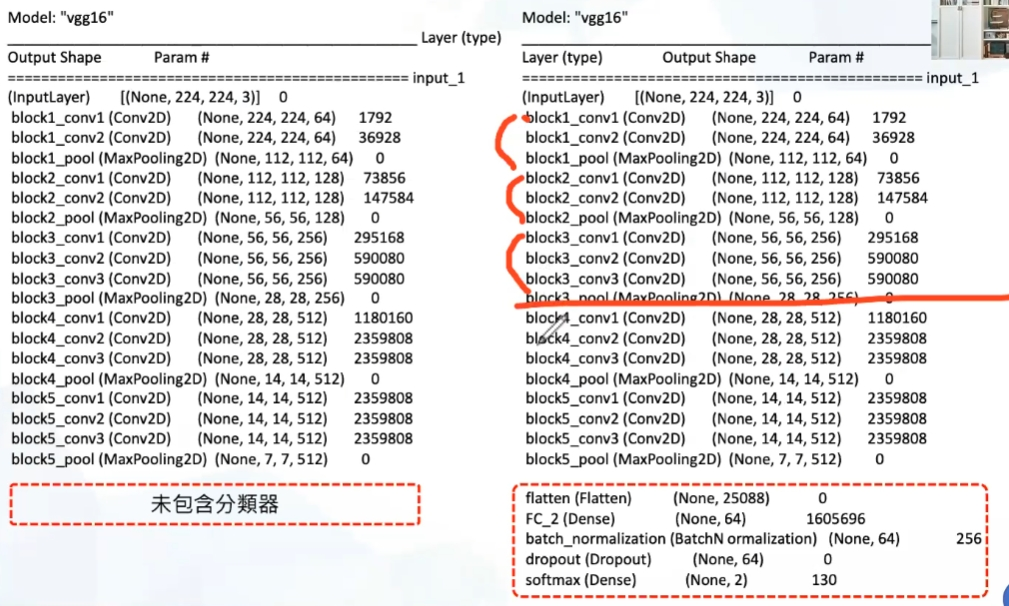

In [44]:
Image('img/vgg1.jpg')

In [5]:
base_model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in base_model.layers:
    layer.trainable = False

base_model.summary(show_trainable=True)

Model: "vgg16"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     N          
                                                                            
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584

In [7]:
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model

last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output

x = Flatten()(last_output)

# add FC layer, which has 64 units and relu activation 
x = Dense(64, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax', name='softmax')(x)

new_model = Model(inputs=base_model.input, outputs=x)

new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
new_model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

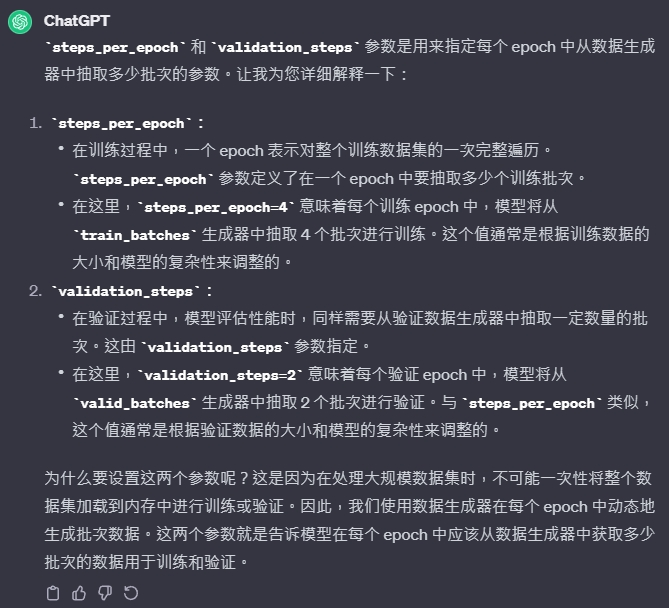

In [46]:
Image('img/steps.jpg', width=300)

In [9]:
new_model.fit_generator(train_batches, steps_per_epoch=4, #----->fit_generator适用于大规模数据集
                   validation_data=valid_batches, validation_steps=2, epochs=20, verbose=2)

C:\Users\user\AppData\Local\Temp\ipykernel_13860\1404983144.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_model.fit_generator(train_batches, steps_per_epoch=4,


Epoch 1/20
4/4 - 20s - loss: 1.2982 - accuracy: 0.5167 - val_loss: 3.2045 - val_accuracy: 0.6167 - 20s/epoch - 5s/step
Epoch 2/20
4/4 - 17s - loss: 0.7097 - accuracy: 0.6917 - val_loss: 1.4297 - val_accuracy: 0.7667 - 17s/epoch - 4s/step
Epoch 3/20
4/4 - 19s - loss: 0.3350 - accuracy: 0.8500 - val_loss: 0.9059 - val_accuracy: 0.8833 - 19s/epoch - 5s/step
Epoch 4/20
4/4 - 17s - loss: 0.4319 - accuracy: 0.8750 - val_loss: 0.4275 - val_accuracy: 0.9000 - 17s/epoch - 4s/step
Epoch 5/20
4/4 - 17s - loss: 0.2043 - accuracy: 0.9083 - val_loss: 0.1645 - val_accuracy: 0.9833 - 17s/epoch - 4s/step
Epoch 6/20
4/4 - 17s - loss: 0.1123 - accuracy: 0.9500 - val_loss: 0.6524 - val_accuracy: 0.9000 - 17s/epoch - 4s/step
Epoch 7/20
4/4 - 17s - loss: 0.1369 - accuracy: 0.9417 - val_loss: 0.3875 - val_accuracy: 0.9333 - 17s/epoch - 4s/step
Epoch 8/20
4/4 - 16s - loss: 0.2266 - accuracy: 0.9250 - val_loss: 0.1685 - val_accuracy: 0.9500 - 16s/epoch - 4s/step
Epoch 9/20
4/4 - 17s - loss: 0.1463 - accuracy: 

## (載test_data / 整批圖做測試)

In [38]:
def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = to_categorical(np.array(data['target']))
    return paths, targets

In [39]:
from sklearn.datasets import load_files
# from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np

test_files, test_targets = load_dataset('test')

In [40]:
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.applications.vgg16 import preprocess_input
from tqdm import tqdm #用來顯示進度條以及展示每一輪所耗費的時間

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

test_tensors = preprocess_input(paths_to_tensor(test_files))

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:04<00:00, 431.64it/s]


In [41]:
print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*new_model.evaluate(test_tensors, test_targets)))

63/63 [==============================] - 191s 3s/step - loss: 0.0837 - accuracy: 0.9675

Testing loss: 0.0837
Testing accuracy: 0.9675


In [43]:
# evaluate and print test accuracy
score = new_model.evaluate(test_tensors, test_targets)
print('\n', 'Test accuracy:', score[1])

63/63 [==============================] - 176s 3s/step - loss: 0.0837 - accuracy: 0.9675

 Test accuracy: 0.9674999713897705
